In [3]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy.optimize import minimize

In [4]:
# Load data
### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data_2_days = np.loadtxt("./Q3data/call_center_data_2_days.txt") 
data_september = np.loadtxt("./Q3data/call_center_data_september.txt") 
data_october = np.loadtxt("./Q3data/call_center_data_october.txt")

In [5]:
# Function to estimate the parameters of a Poisson r.v. from iid data
def poisson_ml_estimator(data):
    def fun(mu):
        return -np.sum(np.log10(poisson.pmf(data,mu)))
    result = minimize(fun, [1])
    return result.x

In [6]:
# Function to estimate the empirical pmf from iid data
def empirical_pmf(data):
    return np.histogram(data, bins = np.arange(np.max(data)))[0]/len(data)

In [7]:
# Function to compute pmf of Poisson with parameter param at x 
def poisson_pmf(param, x):
    return (param**x)*np.exp(-param)/np.math.factorial(x)

In [8]:
# Function to compute pmf of Poisson with parameter param for values between 0 and n 
def poisson_pmf_vec(param, n):
    pmf = np.zeros(n+1)
    for i in range(len(pmf)):
        pmf[i] = poisson_pmf(param, i)
    return pmf

In [9]:
# Function to compute error between two pdfs
def error(x, y):
    err = 0.0
    for i in range(max(len(x), len(y))):
        if len(y) <= i:
           err += np.abs(x[i])
        elif len(x) <= i:
           err += np.abs(y[i])
        else:
           err += np.abs(x[i] - y[i])
    return err

In [10]:
# Pmf of October data
pmf_october = empirical_pmf(data_october)

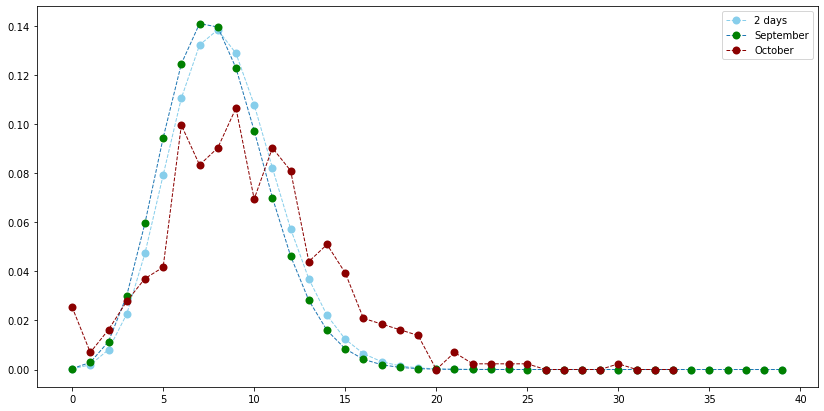

In [11]:
# Maximum likelihood estimation
lambda_2_days = poisson_ml_estimator(data_2_days)
lambda_september = poisson_ml_estimator(data_september)
n = len(pmf_october) + 5 
pmf_2_days_ml = poisson_pmf_vec(lambda_2_days, n)
pmf_september_ml = poisson_pmf_vec(lambda_september, n)
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)    
plot1 = plt.plot(range(n+1), pmf_2_days_ml, lw=1, ls="dashed", markeredgewidth = 0, color = 'skyblue',
                 marker="o", markersize=8, markerfacecolor = 'skyblue', label='2 days')
plot2 = plt.plot(range(n+1), pmf_september_ml, lw=1, ls="dashed", markeredgewidth = 0,
                 marker="o", markersize=8, markerfacecolor = 'green', label='September')
plot3 = plt.plot(range(len(pmf_october)), pmf_october, lw=1, ls="dashed", markeredgewidth = 0,color = 'darkred',
                 marker="o", markersize=8, markerfacecolor = 'darkred', label='October')
plt.legend()

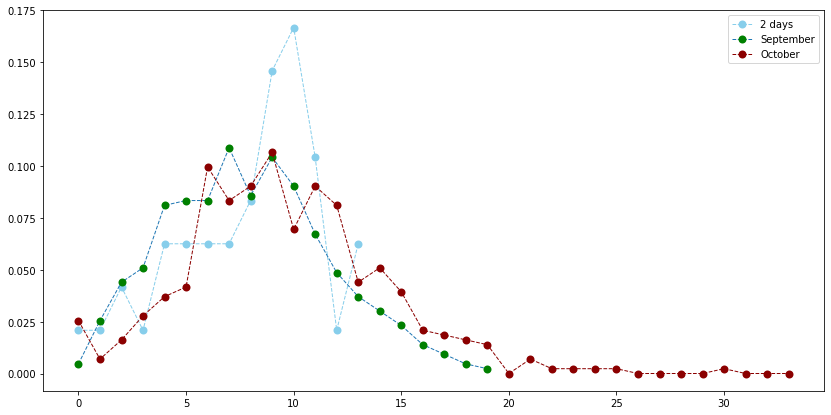

In [12]:
pmf_2_days_emp = empirical_pmf(data_2_days)
pmf_september_emp = empirical_pmf(data_september)
plt.figure(figsize=(14, 7))
plot1 = plt.plot(range(len(pmf_2_days_emp)), pmf_2_days_emp, lw=1, ls="dashed", markeredgewidth = 0,color = 'skyblue',
                 marker="o", markersize=8, markerfacecolor = 'skyblue', label='2 days')
plot2 = plt.plot(range(len(pmf_september_emp)), pmf_september_emp, lw=1, ls="dashed", markeredgewidth = 0,
                 marker="o", markersize=8, markerfacecolor = 'green', label='September')
plot3 = plt.plot(range(len(pmf_october)), pmf_october, lw=1, ls="dashed", markeredgewidth = 0,color = 'darkred',
                 marker="o", markersize=8, markerfacecolor = 'darkred', label='October')
plt.legend()

In [13]:
print("ML fitting errors")
print("2 days: " + str(error(pmf_2_days_ml, pmf_october)))
print("September: " + str(error(pmf_september_ml, pmf_october)))

ML fitting errors
2 days: 0.431046018646819
September: 0.5048493267323189


In [14]:
print("Nonparametric fitting errors")
print("2 days: " + str(error(pmf_2_days_emp, pmf_october)))
print("September: " + str(error(pmf_september_emp, pmf_october)))

Nonparametric fitting errors
2 days: 0.5694444444444442
September: 0.4027777777777776
